In [111]:
#Data proprocessing

In [1]:
#Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#importing the data set

In [4]:
df = pd.read_csv('smsspamcollection (3) (1).tsv', sep='\t')

In [5]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
#check number of ham and spam
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
#Balancing the data
#select the ham data
ham = df[df['label'] =='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [12]:
#select the spam data
spam = df[df['label'] =='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [13]:
#check the shape of data
ham.shape, spam.shape

((4825, 4), (747, 4))

In [14]:
spam.shape[0] #output = no of samples in spam data

747

In [15]:
#now we have to select 747 samples from ham to balence the data

In [16]:
ham = ham.sample(spam.shape[0])

In [17]:
ham.shape

(747, 4)

In [18]:
#check the shape of data
ham.shape, spam.shape

((747, 4), (747, 4))

In [19]:
#append spam data into ham data


df = pd.concat([ham, spam], ignore_index=True)


In [20]:
df.head()

,label,message,length,punct
0,ham,Yup... Ok i go home look at the timings then i...,122,6
1,ham,Honestly i've just made a lovely cup of tea an...,122,2
2,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,12
3,ham,And is there a way you can send shade's stuff ...,85,3
4,ham,Shall i start from hear.,24,1


In [21]:
df.shape

(1494, 4)

In [22]:
#Data visualization

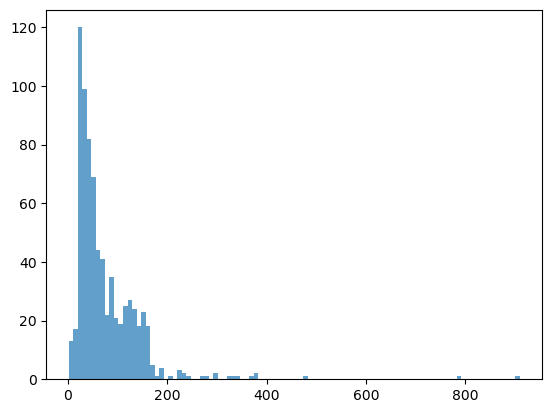

In [23]:
#plot histogram of length for ham messages
plt.hist(df[df['label'] == 'ham']['length'],bins=100, alpha=0.7)
plt.show()

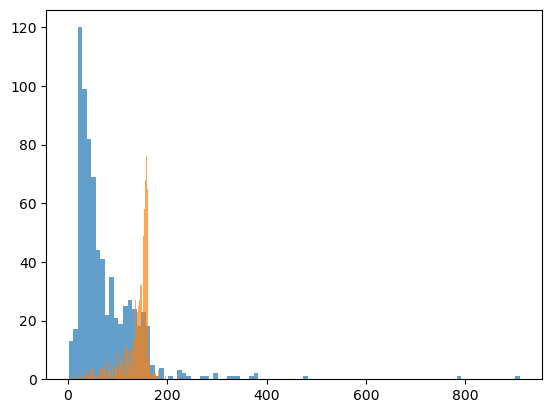

In [24]:
#plot histogram of length for ham and spam both
plt.hist(df[df['label'] == 'ham']['length'],bins=100, alpha=0.7)
plt.hist(df[df['label'] == 'spam']['length'],bins=100, alpha=0.7)
plt.show()

In [25]:
#IT LOOK LKIKE THERE'S-A SMALL RANGE OF VALUES WHERE A MASSAGE IS MORE LIKELY  TO BE SPAM THAN HAM

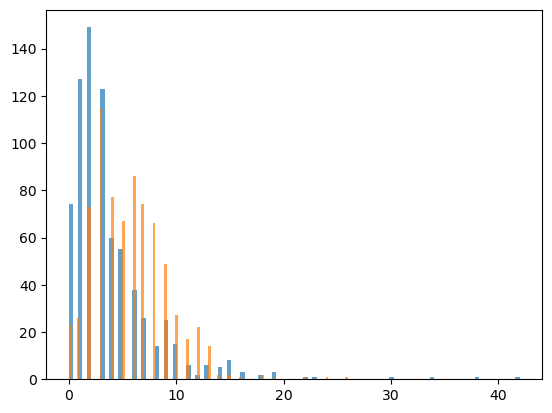

In [26]:
# PLOT HISTOGRAM OF PUNCT FOR HAM AND SPAM BOTH
plt.hist(df[df['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(df[df['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [27]:
#here we are not getting more information

In [28]:
#next
#split data into train &  test sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(df['message'],df['label'],test_size=0.3,random_state=0,shuffle=True)

In [31]:
x_train

1438      You have 1 new message. Please call 08715205273
431     Really dun bluff me leh... U sleep early too. ...
194                         2 celebrate my bday, y else?
240                                       ELLO BABE U OK?
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559     Nimbomsons. Yep phone knows that one. Obviousl...
684                   You call him now ok i said call him
Name: message, Length: 1045, dtype: object

In [32]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

In [33]:
#building the model(random forest)

In [34]:
from sklearn.pipeline import Pipeline
#there will be lot repeated processes for training and testing the dataset separtely,
#to avoid that we are using pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#we are importing TfidVectorizer to utilize bag of words model in sklearn
from sklearn.ensemble import RandomForestClassifier

In [35]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [36]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [37]:
#predicting the results(random forest)

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [43]:
y_pred =classifier.predict(x_test)

In [44]:
#confusion metrix
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 22, 200]], dtype=int64)

In [39]:
#ham and spam
#spam and ham

In [45]:
#classification report
print(classification_report(y_test,y_pred))
#we are geeting 95% accuracy

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [47]:
accuracy_score(y_test,y_pred)
#accuracy

0.9487750556792873

In [49]:
#predict a real message
classifier.predict(['Hello,You are learning Natural Language Processing'])

array(['ham'], dtype=object)

In [50]:
classifier.predict(['Hope you are doing good and learning new thing'])

array(['ham'], dtype=object)

In [51]:
classifier.predict(['congratulations,you won a lottery ticket worth $1 million ! to claim call on 446677'])

array(['spam'], dtype=object)

In [52]:
#next step
# Building the model (SVM)

In [53]:
from sklearn.svm import SVC

In [55]:
classifier =Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [56]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
y_pred =classifier.predict(x_test)

In [59]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 19, 203]], dtype=int64)

In [60]:
#classification report
print(classification_report(y_test,y_pred))
#we are geeting 95% accuracy

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [61]:
accuracy_score(y_pred,y_test)

0.9510022271714922

In [62]:
classifier.predict(['Hope you are doing good and learning new thing'])

array(['ham'], dtype=object)